# unit 4.0 - Convolutional layers

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/culurciello/deep-learning-course-source/blob/main/source/lectures/40-conv-layer.ipynb)


What are convolutional layers and what do they compute?

Convolution are a mathematical operation defines as:

$$
y[n] = \sum x[a] w[n-a]
$$

where $x(t)$ is the input signal, $w(t)$ is the kernel (or filter) and $y(t)$ is the output signal.


Convolutional layers are the basic building blocks of Convolutional Neural Networks (CNNs). They are designed to extract features from input data.

Convoultion and correlation are two closely related operations. In convolution, the kernel is flipped before applying it to the input. In correlation, the kernel is not flipped. In practice, the difference is not important, as the kernel weights are learned by the network.


## 1D convolution


Here we show the [animation of a 1d convolution](https://e2eml.school/convolution_one_d.html) filter and what it does to an input sequence:

![](images/1d-conv-animation.gif)

In this animation you see a 1D convolution filter (blue) moving across an input sequence (dark red). The filter is a 1x3 kernel, which means it has 3 weights. The filter is applied to the input sequence by moving it across the sequence and computing the dot product of the filter weights and the input sequence at each position. The result of the dot product is the output of the convolution at that position.



We have already seen an [example of 1D convolution applied to a sequence](https://githubtocolab.com/culurciello/deep-learning-course-source/blob/main/source/lectures/22-seq-cnn-1d.ipynb). What  transformation did it perform?

A convolution, similar to a linear layer, is designed to extract "features" in ain input signal. Features are repeating patterns in the signal, for examples oriented edges in an image, or short waveforms in an audio file.

A 1D convolution is basically similar to a liner layer applied to a sequence of data points. The difference is that a convolution is applied many times in the sequence by moving the weights kernel across the sequence.

See this figure for more detail:

![](images/1d-conv.png)

In this example you see an input sequence $x_1$ to $x_n$. A 1D convolution wit a kernel of 1x3 weights is applied to the sequence in the first layer and also the second layer.

a 1D convolution can have multiple plains as inputs (multiple sequences or a sequence with many features), and also can usually generate an output with even more features (5 in this example).

The red kernel moves across the sequence down vertically to take the next set of 3 elements and produce another output.


In this example below we show how a convolution affects an input sequence of numbers (here a sin wave). Notice how different random filters find different features in the input sequence. Some filters invert the signal, some follow it, and most introduce a small phase change.

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt

torch.Size([136])


Text(0.5, 1.0, 'gaussian')

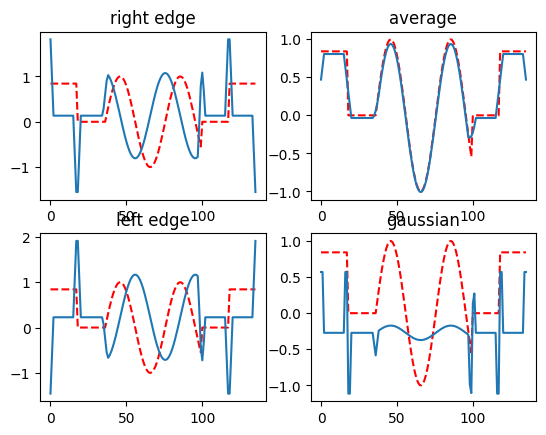

In [17]:
# seq = torch.rand(1,64)
t = torch.cat([torch.ones(18), torch.zeros(18), torch.linspace(0,10,64), torch.zeros(18), torch.ones(18)])

print(t.shape)
seq = torch.sin(t).unsqueeze(0)
# seq = (torch.sin(t)+torch.sin(2*t)).unsqueeze(0)
# print(seq.shape)
sp = seq.permute(1,0)
m = torch.nn.Conv1d(1, 4, 5, padding=2) # implements 4 filters with a kernel of 5 numbers
# print(m.weight)
# print(m.weight.shape)
f = torch.Tensor([[[-1,-1, 0, 1, 1]],  # right edge 
                  [[ 1/5, 1/5, 1/5, 1/5, 1/5]],  # average
                  [[ 1, 1, 0,-1,-1]],  # left edge
                  [[-1, 0, 2, 0,-1]]]) # gaussian
# print(m.weight.shape)
m.weight = torch.nn.Parameter(f)
# print("convolution filer: ")
# print(m.weight)
output = m(seq)
# print(output.shape)
op = output.permute(1,0).detach()

# plot
fig, axs = plt.subplots(2, 2) # 2x2 plots
axs[0,0].plot(sp, 'r--', label="input") # plot original sin wave in red
axs[0,0].plot(op[:,0], label="right edge") # plot 4 outputs in green
axs[0,0].set_title('right edge')

axs[0,1].plot(sp, 'r--', label="input") # plot original sin wave in red
axs[0,1].plot(op[:,1], label="average") # plot 4 outputs in green
axs[0,1].set_title('average')

axs[1,0].plot(sp, 'r--', label="input") # plot original sin wave in red
axs[1,0].plot(op[:,2], label="left edge") # plot 4 outputs in green
axs[1,0].set_title('left edge')

axs[1,1].plot(sp, 'r--', label="input") # plot original sin wave in red
axs[1,1].plot(op[:,3], label="gaussian") # plot 4 outputs in green
axs[1,1].set_title('gaussian')


## 2D convolution

A 2D convolution can be applied to data arranged in 2D, for example images and image planes. 
An image is convolved by a 2d filter to produce a feature map - another image usually of smaller size. See this example illustration:

![](images/2dconv.png)

We can learn what a convolution does with a few examples. Let us load an image and plot it:

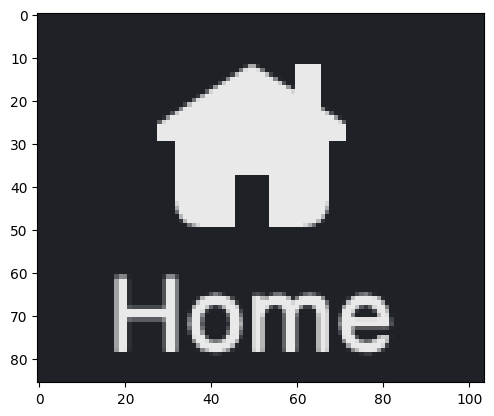

In [3]:
ima = torchvision.io.read_image("images/home.png")
iman = ima.permute(1, 2, 0)
# iman.shape
plt.imshow(iman)

Now we can try to run a convolutional operation from PyTorch.

Here we run 16 convolution filters of 5x5 pixels and with a stride of 2 pixels.

This runs on all 4 channels of the input image (RGBW).

You will recognize these numbers in the Conv2d operator:

In [6]:
with torch.no_grad():
    conv_layer = torch.nn.Conv2d(4, 16, 3, stride=2)
ima.shape
processed = conv_layer(ima.float())
print(processed.shape)

torch.Size([16, 42, 51])


we will now plot all the 16 images output of the Conv2d operator. You will see how each convolution processes the image. 

The convolution filter weights were randomly generated, so you will see 16 different outputs.

Some enhance vertical edges, some horizontal edges, some will blur the image, etc.

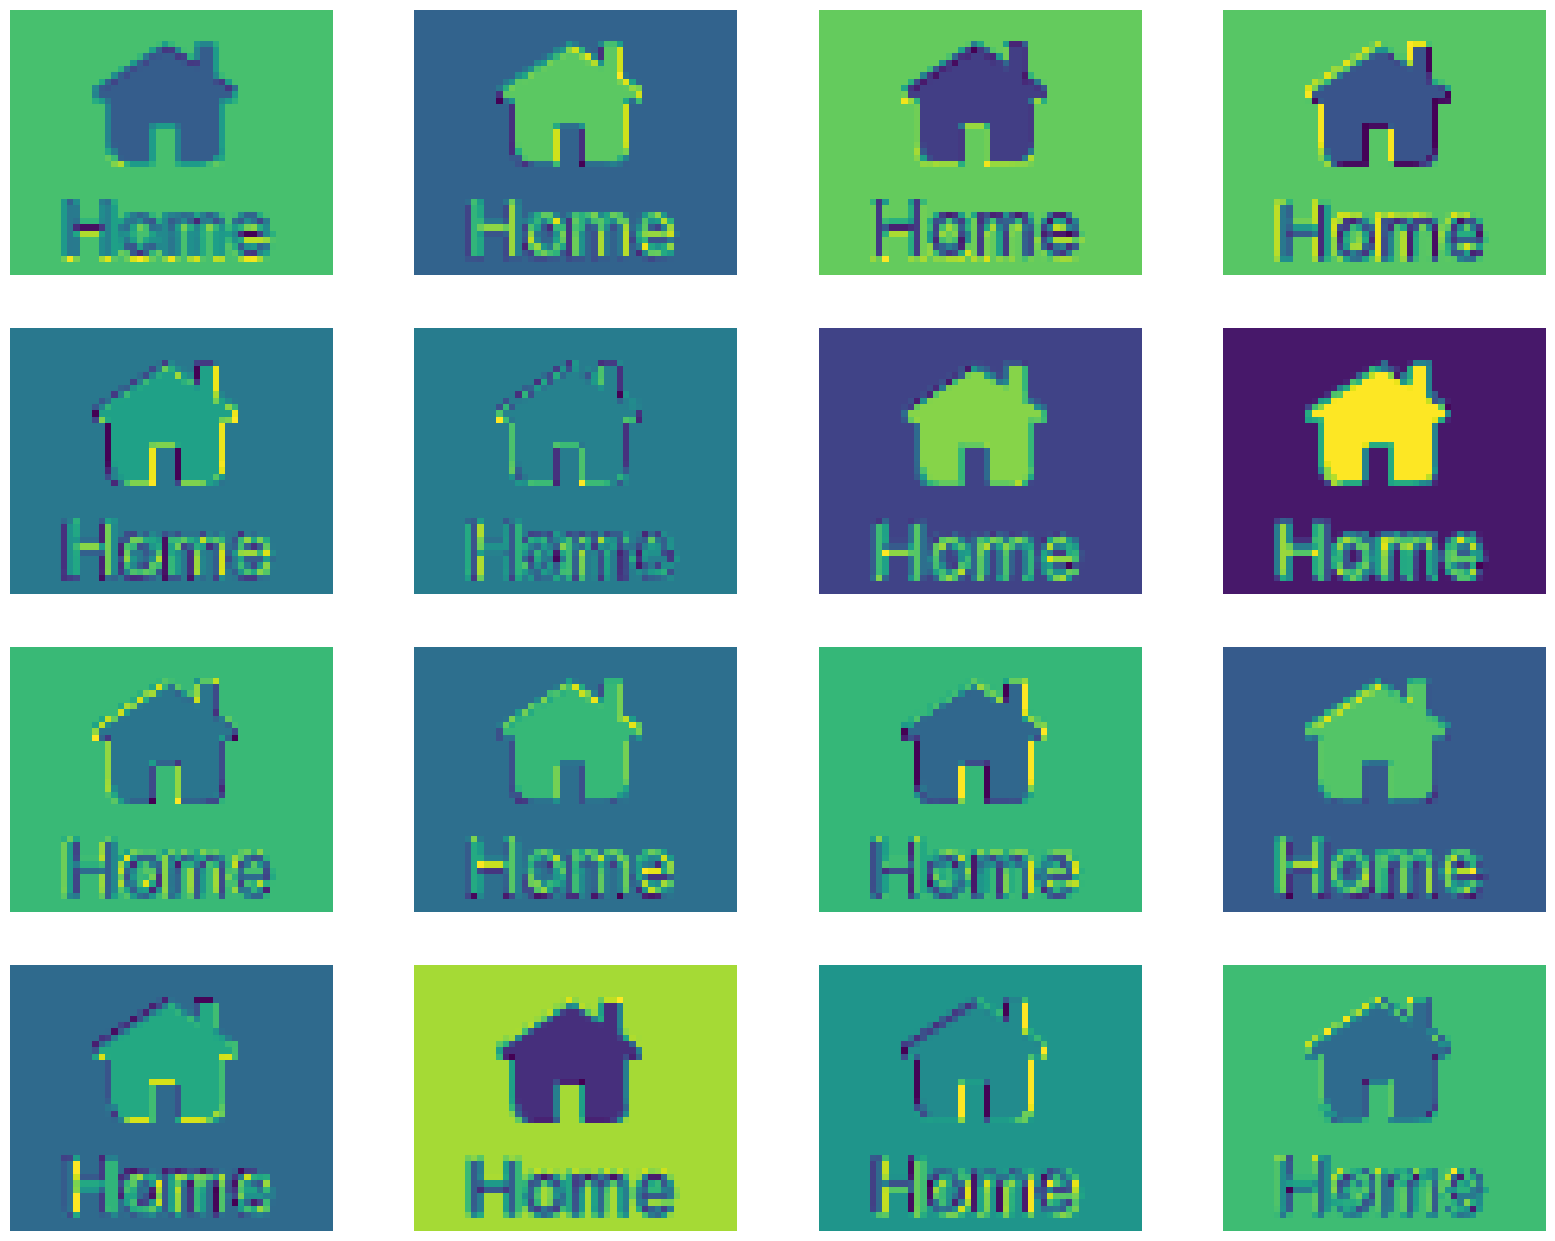

In [7]:
fig = plt.figure(figsize=(20, 20))
for i in range(len(processed)):
    a = fig.add_subplot(5, 4, i+1)
    processed_display = processed[i].detach().unsqueeze(0).permute(1, 2, 0)
#     print(processed_display.shape)
    imgplot = plt.imshow(processed_display)
    a.axis("off")